In [222]:
import pandas as pd

In [224]:
data = pd.read_excel('Goalkeeper Player Similarity KMeans Data.xlsx')

In [225]:
data = data.fillna(0)

In [226]:
filtered_data = data[data['90s'] >= 15]

In [230]:
print(filtered_data.columns)

Index(['Player', 'Nation', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'GA90', 'Saves', 'Save%', 'CS', 'CS%', 'PKsv', 'PKm',
       'Save%.1', 'CK', 'PSxG', 'PSxG/SoT', 'PSxG+/-', 'Cmp', 'Att', 'Cmp%',
       'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1',
       'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', 'AvgDist'],
      dtype='object')


In [232]:
hover_data_info = filtered_data[['Player', 'Age', 'Squad', 'Comp']]

In [234]:
filtered_data = filtered_data.drop(columns=['Player', 'Nation', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s'])

In [236]:
from sklearn.preprocessing import StandardScaler

In [238]:
scaler = StandardScaler()

In [240]:
scaled_data = scaler.fit_transform(filtered_data)

In [242]:
from sklearn.decomposition import PCA

In [244]:
pca_model = PCA(n_components = 11)

In [246]:
pca_data = pca.fit_transform(scaled_data)

In [248]:
from sklearn.manifold import TSNE

In [250]:
tsne_model = TSNE(n_components = 2, perplexity = 10, learning_rate = 100)

In [252]:
tsne_data = tsne_model.fit_transform(pca_data)

In [253]:
from sklearn.cluster import KMeans

In [254]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\jbinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jbinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jbinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\jbinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

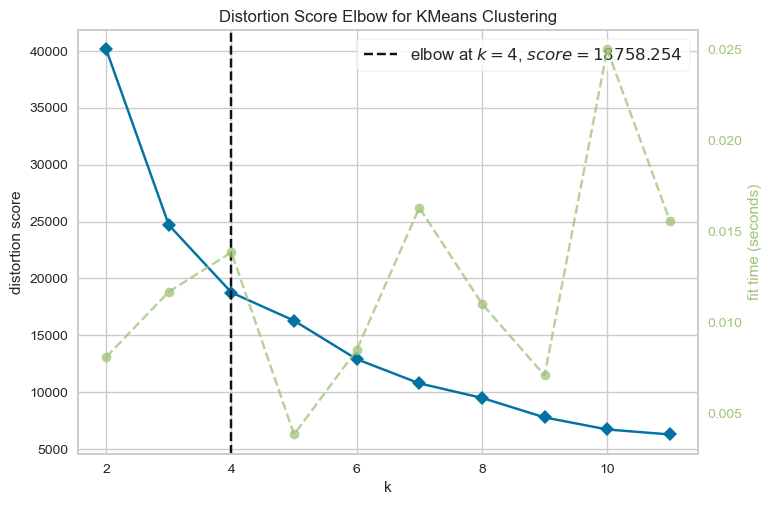

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [255]:
kmeans_test = KMeans()
visualizer = KElbowVisualizer(kmeans_test, k=(2, 12))
visualizer.fit(tsne_data)
visualizer.show()

In [256]:
kmeans_model = KMeans(n_clusters = 4)

In [257]:
labels = kmeans_model.fit_predict(tsne_data)

C:\Users\jbinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [258]:
import plotly.express as px

In [262]:
plot_df = pd.DataFrame(tsne_data, columns = ['t-SNE 1', 't-SNE 2'])

In [263]:
plot_df['Cluster'] = labels

In [264]:
plot_df = pd.concat([plot_df, hover_data_info.reset_index(drop=True)], axis=1)

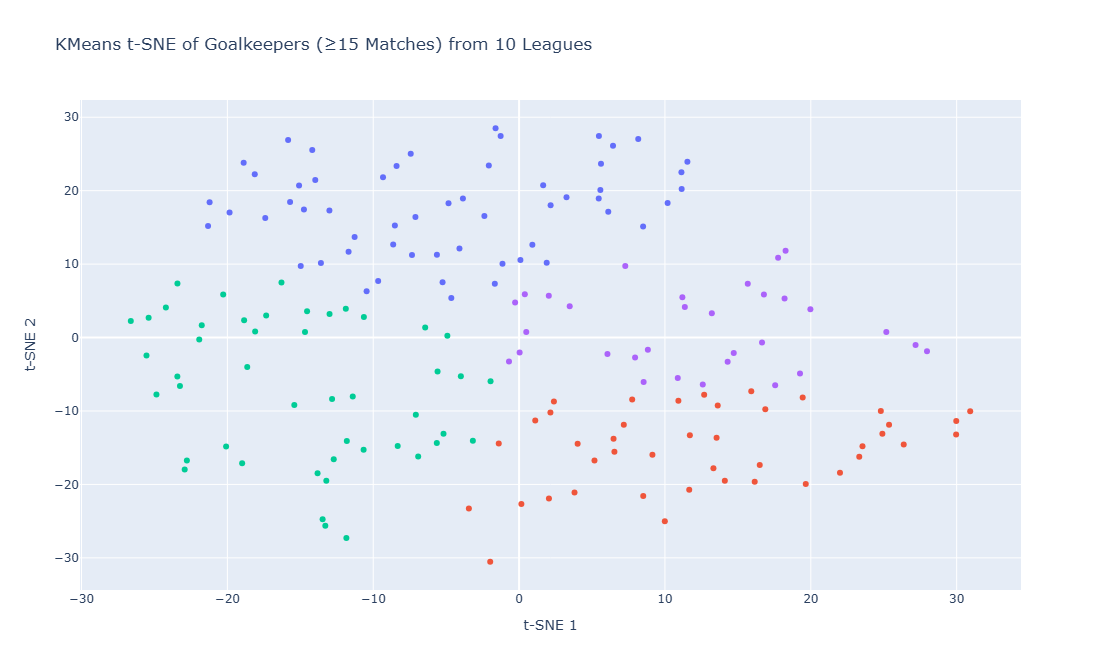

In [274]:
fig = px.scatter(
    plot_df, 
    x='t-SNE 1', 
    y='t-SNE 2', 
    color=plot_df['Cluster'].astype(str),  
    hover_data=['Player', 'Age', 'Squad', 'Comp'],  
    title = 'KMeans t-SNE of Goalkeepers (≥15 Matches) from 10 Leagues',
    width = 1000,
    height=670
)

fig.update_layout(
    showlegend=False  # Hide the legend
)

fig.show()